# ADIDAS SALES PREDICTIONS TIME SERIES

In [8]:
import pandas as pd
from datetime import date,timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import plotly.express as px

In [7]:
#pip install statsmodels

In [5]:
df=pd.read_csv('adidas-quarterly-sales.csv')

In [6]:
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [9]:
px.line(df,x='Time Period',y='Revenue')

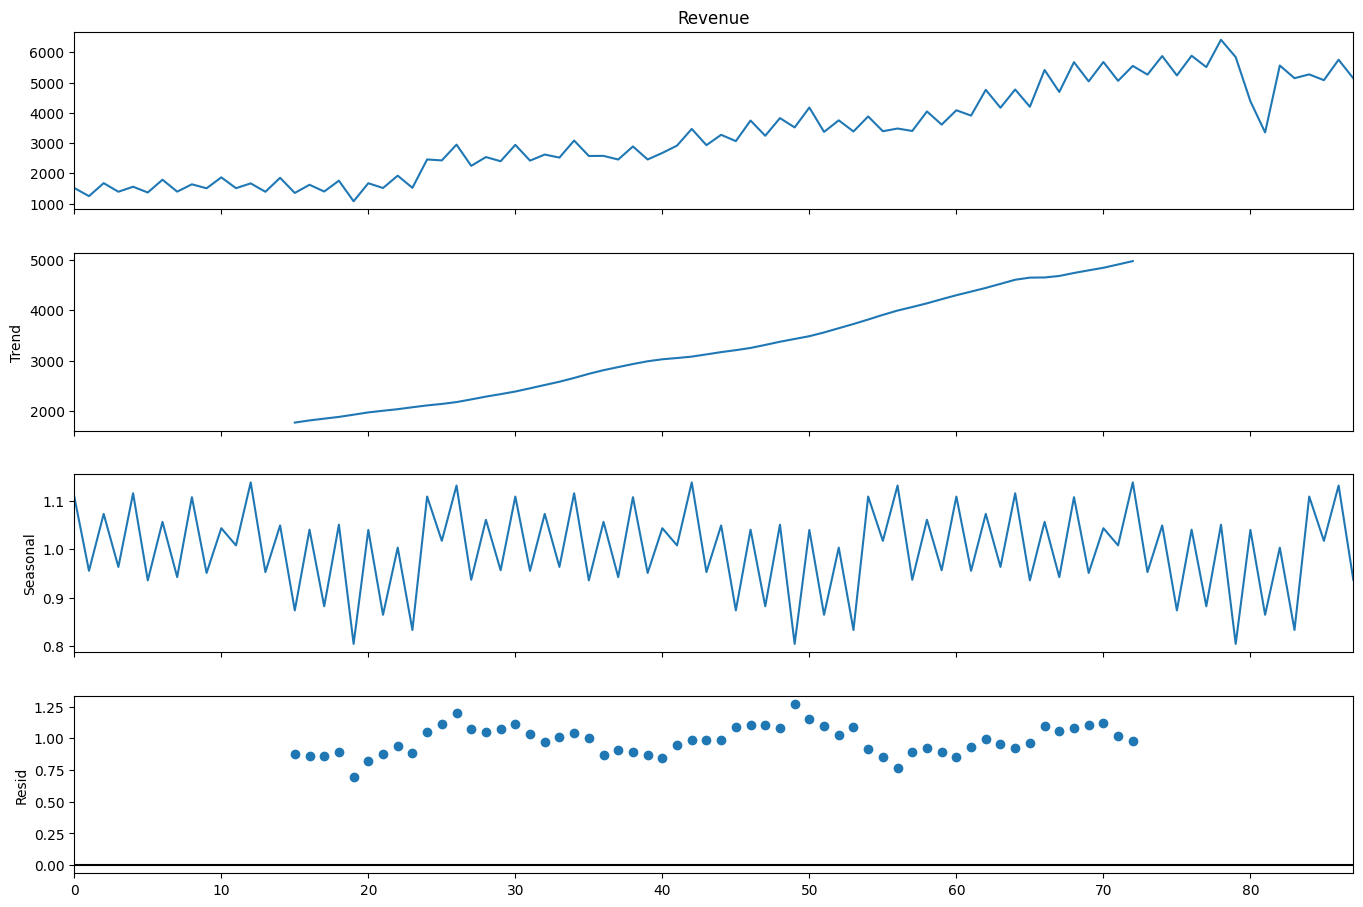

In [10]:
result=seasonal_decompose(df['Revenue'],model='multiplicative',period=30)

fig=result.plot()
fig.set_size_inches(15,10)

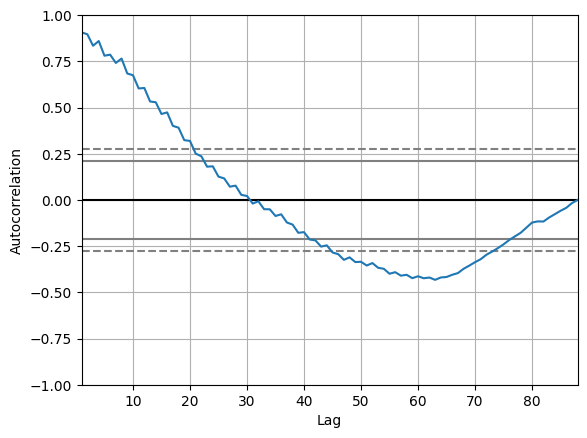

In [11]:
pd.plotting.autocorrelation_plot(df['Revenue']);

In [12]:
model=sm.tsa.statespace.SARIMAX(df['Revenue'])
result=model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.80184D+00    |proj g|=  7.23344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     13      1     0     0   8.280D-06   7.795D+00
  F =   7.7947580206305851     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   88
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -685.939
Date:                Sat, 03 Aug 2024   AIC                           1375.877
Time:                        16:58:37   BIC                           1380.832
Sample:                             0   HQIC                          1377.874
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9878      0.014     68.840      0.000       0.960       1.016
sigma2      3.324e+05   4.14e+04      8.028      0.000    2.51e+05    4.14e+05
===================================================================================
Ljung-Box (L1) (Q):                  33.98   Jarque-Bera (JB):                 7.84
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               3.78   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
predictions=result.predict(len(df),len(df)+7)
predictions

88    5074.368263
89    5012.500149
90    4951.386348
91    4891.017664
92    4831.385012
93    4772.479418
94    4714.292017
95    4656.814053
Name: predicted_mean, dtype: float64

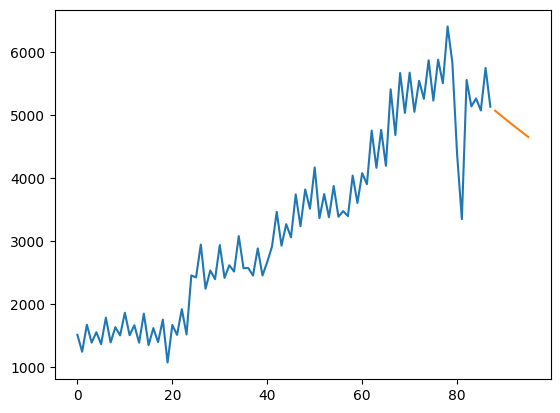

In [14]:
df['Revenue'].plot()
predictions.plot();